In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# List all NVIDIA GPUs as avaialble in this computer (or Colab's session)
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-75ac51d8-4fc5-746e-ab07-5cb56305e123)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics


np.random.seed(1234)
tf.random.set_seed(5678)

In [4]:
file_path = "/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_4_Sequential data/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt"

columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv(file_path, header = None, names = columns)
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x-axis     1098203 non-null  float64
 4   y-axis     1098203 non-null  float64
 5   z-axis     1098203 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 58.7+ MB


In [5]:
df['z-axis'] = df['z-axis'].apply(lambda x: float(x.replace(';', '')))

In [ ]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [ ]:
df.describe()

,user,timestamp,x-axis,y-axis,z-axis
count,1.098203e+06,1.098203e+06,1.098203e+06,1.098203e+06,1.098203e+06
mean,1.886067e+01,3.340910e+13,6.628645e-01,7.255642e+00,4.110616e-01
std,1.021423e+01,4.944968e+13,6.849060e+00,6.746207e+00,4.754109e+00
min,1.000000e+00,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,2.019128e+12,-2.870000e+00,3.170000e+00,-2.220000e+00
50%,1.900000e+01,9.722802e+12,2.700000e-01,7.930000e+00,0.000000e+00
75%,2.800000e+01,4.996572e+13,4.440000e+00,1.156000e+01,2.720000e+00
max,3.600000e+01,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


In [6]:
df = df[df['timestamp'] != 0]

In [7]:
df = df.sort_values(by = ['user', 'timestamp'], ignore_index=True)

In [8]:
df.describe()

,user,timestamp,x-axis,y-axis,z-axis
count,1.085360e+06,1.085360e+06,1.085360e+06,1.085360e+06,1.085360e+06
mean,1.883054e+01,3.380443e+13,6.707082e-01,7.341480e+00,4.159279e-01
std,1.023379e+01,4.960688e+13,6.889081e+00,6.739406e+00,4.781942e+00
min,1.000000e+00,7.345234e+10,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,2.076802e+12,-2.960000e+00,3.340000e+00,-2.260000e+00
50%,1.900000e+01,1.009670e+13,3.400000e-01,8.010000e+00,-4.000000e-02
75%,2.800000e+01,5.559404e+13,4.480000e+00,1.165000e+01,2.760000e+00
max,3.600000e+01,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


In [ ]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


##Explore data

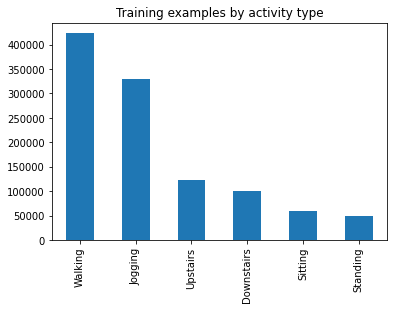

In [ ]:
df['activity'].value_counts().plot(kind='bar',
                                   title='Training examples by activity type',
                                   grid=False,
                                   )

In [ ]:
df['activity'].value_counts()

Walking       423905
Jogging       330330
Upstairs      122598
Downstairs    100194
Sitting        59939
Standing       48394
Name: activity, dtype: int64

In [ ]:
print(len(df))

1085360


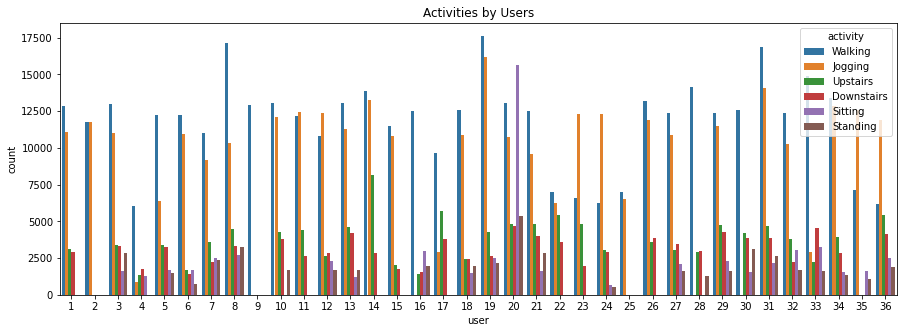

In [ ]:
plt.figure(figsize = (15, 5))
sns.countplot(x = 'user', hue = 'activity', data = df)
plt.title('Activities by Users')
plt.show()

In [9]:
def plot_activity(activity, df):
  data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:100]
  data.plot(figsize=(15, 5),
            title=activity,
            grid=False,
            ylim=(-10,20),
            )
  plt.legend(loc='upper right')

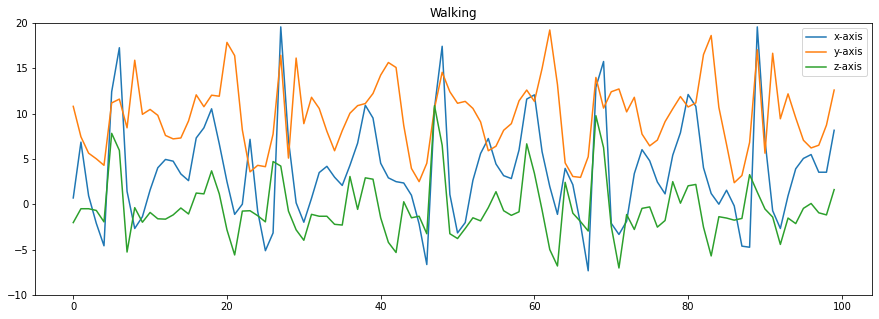

In [ ]:
plot_activity('Walking', df)
# plt.savefig('walking.png')

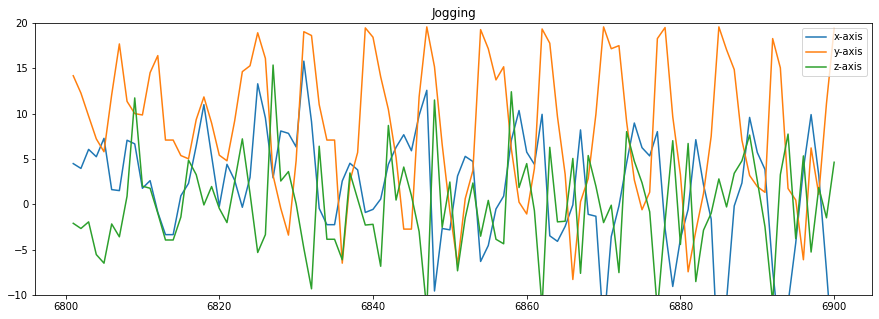

In [ ]:
plot_activity('Jogging', df)
# plt.savefig('jogging.png')

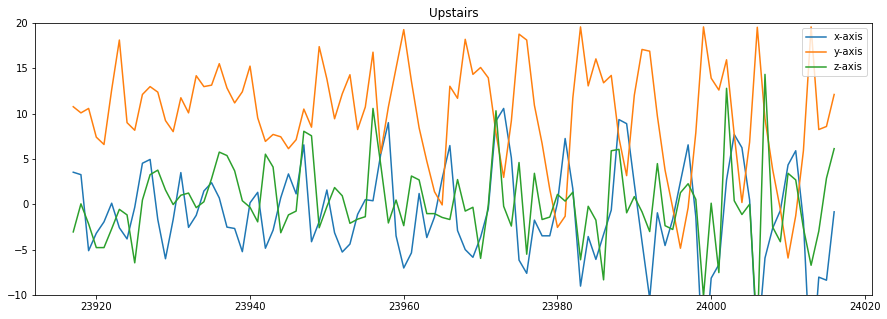

In [10]:
plot_activity('Upstairs', df)
# plt.savefig('upstairs.png')

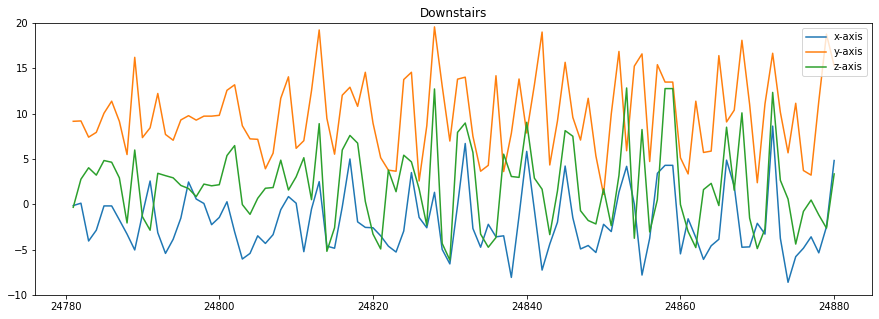

In [11]:
plot_activity('Downstairs', df)
# plt.savefig('downstair.png')

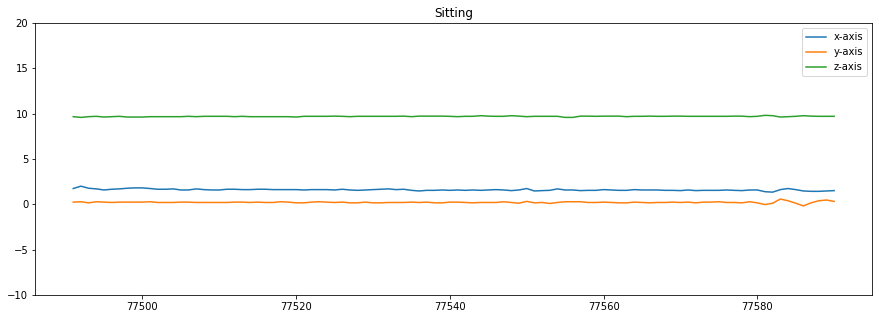

In [ ]:
plot_activity('Sitting', df)
# plt.savefig('sitting.png')

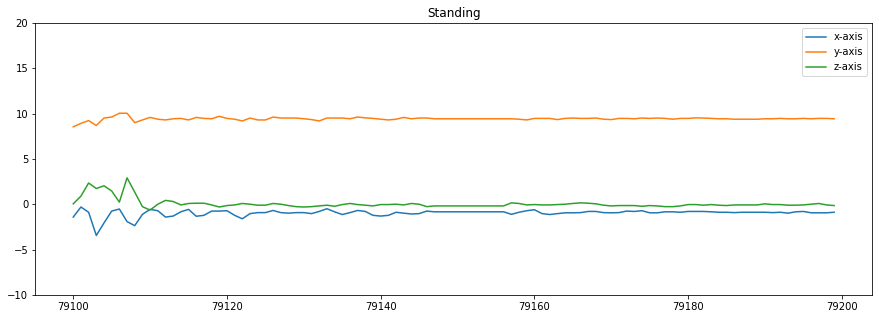

In [ ]:
plot_activity('Standing', df)
# plt.savefig('standing.png')

##Split the data

In [12]:
train_df = df[df['user'] <= 25]
val_df = df[(df['user'] > 25) & (df['user'] <= 32)]
test_df = df[df['user'] > 32]

In [13]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(738323, 6)
(227135, 6)
(119902, 6)


In [ ]:
train_df['activity'].value_counts()

Walking       288339
Jogging       231513
Upstairs       83989
Downstairs     64123
Sitting        39833
Standing       30526
Name: activity, dtype: int64

In [ ]:
train_df['activity'].value_counts(normalize=True)

Walking       0.390532
Jogging       0.313566
Upstairs      0.113756
Downstairs    0.086850
Sitting       0.053951
Standing      0.041345
Name: activity, dtype: float64

In [ ]:
val_df['activity'].value_counts()

Walking       93929
Jogging       58551
Upstairs      27045
Downstairs    24513
Standing      11913
Sitting       11184
Name: activity, dtype: int64

In [ ]:
val_df['activity'].value_counts(normalize=True)

Walking       0.413538
Jogging       0.257781
Upstairs      0.119070
Downstairs    0.107923
Standing      0.052449
Sitting       0.049239
Name: activity, dtype: float64

In [ ]:
test_df['activity'].value_counts()

Walking       41637
Jogging       40266
Upstairs      11564
Downstairs    11558
Sitting        8922
Standing       5955
Name: activity, dtype: int64

In [ ]:
test_df['activity'].value_counts(normalize=True)

Walking       0.347259
Jogging       0.335824
Upstairs      0.096445
Downstairs    0.096395
Sitting       0.074411
Standing      0.049666
Name: activity, dtype: float64

In [14]:
train_scale = train_df.iloc[:,3:].apply(lambda x: (x-x.min()) / (x.max() - x.min()), axis=0)

train_scale_df = train_df.iloc[:,:3]

train_scale_df['x-axis'] = train_scale['x-axis']
train_scale_df['y-axis'] = train_scale['y-axis']
train_scale_df['z-axis'] = train_scale['z-axis']

In [15]:
train_scale_df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.513145,0.766961,0.450901
1,1,Walking,4991972333000,0.668857,0.682219,0.489723
2,1,Walking,4992022351000,0.519211,0.636570,0.489723
3,1,Walking,4992072339000,0.442366,0.620933,0.484902
4,1,Walking,4992122358000,0.379676,0.602774,0.452931


In [16]:
val_scale = val_df.iloc[:,3:].apply(lambda x: (x-x.min())/ (x.max() - x.min()), axis=0)

val_scale_df = val_df.iloc[:,:3]

val_scale_df['x-axis'] = val_scale['x-axis']
val_scale_df['y-axis'] = val_scale['y-axis']
val_scale_df['z-axis'] = val_scale['z-axis']

In [ ]:
val_scale_df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
738323,26,Walking,220762340000,0.705005,0.774448,0.549015
738324,26,Walking,220812328000,0.470677,0.800864,0.484259
738325,26,Walking,220862346000,0.618554,0.778258,0.376504
738326,26,Walking,220912334000,0.628160,0.660655,0.423599
738327,26,Walking,220962321000,0.760111,0.665481,0.475301


In [17]:
test_scale = test_df.iloc[:,3:].apply(lambda x: (x-x.min())/ (x.max() - x.min()), axis=0)

test_scale_df = test_df.iloc[:,:3]

test_scale_df['x-axis'] = test_scale['x-axis']
test_scale_df['y-axis'] = test_scale['y-axis']
test_scale_df['z-axis'] = test_scale['z-axis']

In [ ]:
test_scale_df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
965458,33,Standing,504382335000,0.506290,0.724009,0.520569
965459,33,Standing,504432262000,0.506290,0.724864,0.520569
965460,33,Standing,504482280000,0.505520,0.724864,0.520569
965461,33,Standing,504532298000,0.504493,0.724009,0.520569
965462,33,Standing,504582316000,0.505520,0.724864,0.520569


In [18]:
print(train_scale_df.shape)
print(val_scale_df.shape)
print(test_scale_df.shape)

(738323, 6)
(227135, 6)
(119902, 6)


In [19]:
class_labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']

In [20]:
N_TIME_STEPS = 100
N_FEATURES = 3
step = 50
train = []
train_labels = []
for i in range(0, len(train_scale_df) - N_TIME_STEPS, step):
    xs = train_scale_df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = train_scale_df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = train_scale_df['z-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(train_scale_df['activity'][i: i + N_TIME_STEPS])[0][0]
    train.append([xs, ys, zs])
    train_labels.append(label)

train = np.asarray(train, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
train_labels = np.asarray(pd.get_dummies(train_labels), dtype = np.float32)

In [21]:
print(f"train shape: {train.shape}")
print(f"train label shape: {train_labels.shape}")

train shape: (14765, 100, 3)
train label shape: (14765, 6)


In [ ]:
x = np.argmax(train_labels, axis=1)
unique, counts = np.unique(x, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 1285]
 [   1 4631]
 [   2  798]
 [   3  609]
 [   4 1678]
 [   5 5764]]


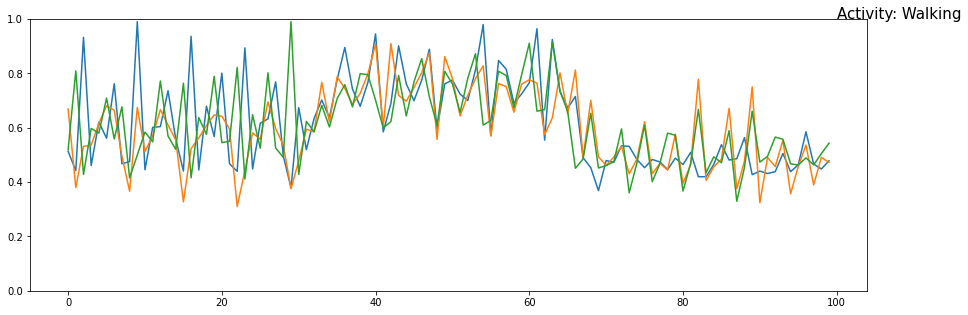

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train[0])
plt.ylim(0,1)
plt.text(100, 1, f'Activity: {class_labels[np.argmax(train_labels[0])]}', fontsize = 15)
plt.show()

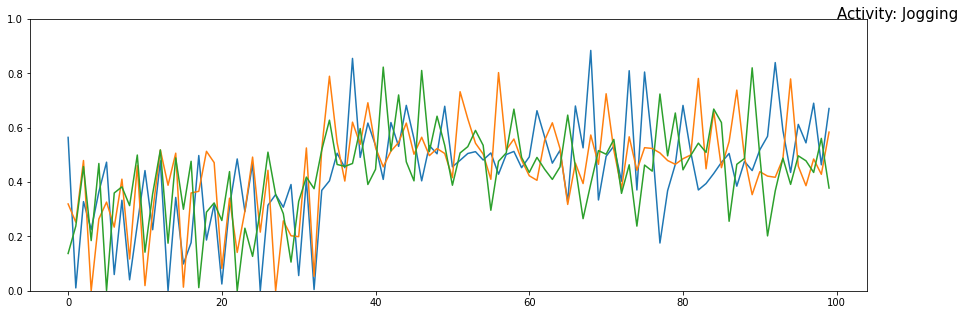

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train[1000])
plt.ylim(0,1)
plt.text(100, 1, f'Activity: {class_labels[np.argmax(train_labels[1000])]}', fontsize = 15)
plt.show()

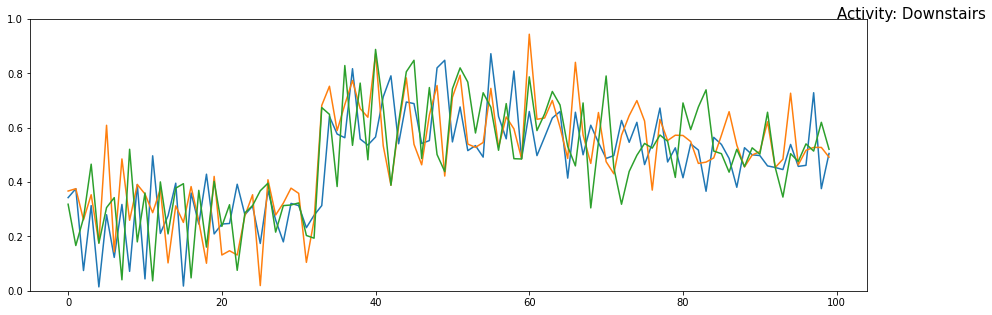

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train[500])
plt.ylim(0,1)
plt.text(100, 1, f'Activity: {class_labels[np.argmax(train_labels[500])]}', fontsize = 15)
plt.show()

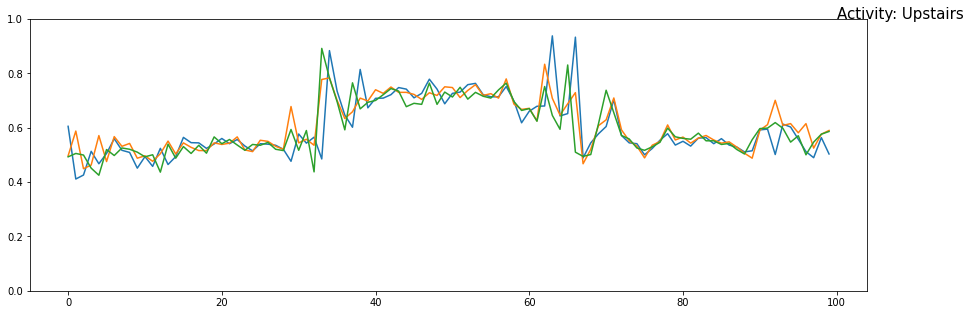

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(train[13000])
plt.ylim(0,1)
plt.text(100, 1, f'Activity: {class_labels[np.argmax(train_labels[13000])]}', fontsize = 15)
plt.show()

In [22]:
N_TIME_STEPS = 100
N_FEATURES = 3
step = 50
val = []
val_labels = []
for i in range(0, len(val_scale_df) - N_TIME_STEPS, step):
    xs = val_scale_df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = val_scale_df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = val_scale_df['z-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(val_scale_df['activity'][i: i + N_TIME_STEPS])[0][0]
    val.append([xs, ys, zs])
    val_labels.append(label)

val = np.asarray(val, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
val_labels = np.asarray(pd.get_dummies(val_labels), dtype = np.float32)

In [23]:
print(f"validate shape: {val.shape}")
print(f"validate label shape: {val_labels.shape}")

validate shape: (4541, 100, 3)
validate label shape: (4541, 6)


In [24]:
N_TIME_STEPS = 100
N_FEATURES = 3
step = 50
test = []
test_labels = []
for i in range(0, len(test_scale_df) - N_TIME_STEPS, step):
    xs = test_scale_df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = test_scale_df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = test_scale_df['z-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(test_scale_df['activity'][i: i + N_TIME_STEPS])[0][0]
    test.append([xs, ys, zs])
    test_labels.append(label)

test = np.asarray(test, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
test_labels = np.asarray(pd.get_dummies(test_labels), dtype = np.float32)

In [25]:
print(f"test shape: {test.shape}")
print(f"test label shape: {test_labels.shape}")

test shape: (2397, 100, 3)
test label shape: (2397, 6)


##Building the model

In [26]:
inputs = tf.keras.layers.Input(shape=(100,3))

x = tf.keras.layers.LSTM(128, return_sequences=True)(inputs)
x = tf.keras.layers.LSTM(128, return_sequences=False)(x)


outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 3)]          0         
                                                                 
 lstm (LSTM)                 (None, 100, 128)          67584     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 199,942
Trainable params: 199,942
Non-trainable params: 0
_________________________________________________________________


In [27]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [28]:
%cd '/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_4_Sequential data/lstm'

/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_4_Sequential data/lstm


In [29]:
checkpoint_filepath = "bestmodel_epoch.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               save_weights_only=False,
                                                               monitor='val_accuracy',
                                                               mode='max',
                                                               save_best_only=True,
                                                               )

csv_logger = tf.keras.callbacks.CSVLogger('training.log')

In [30]:
epochs=100

history = model.fit(train, train_labels,
                    validation_data=(val, val_labels),
                    epochs=epochs,
                    batch_size=64,
                    verbose=1,
                    callbacks=[model_checkpoint_callback, csv_logger],
                    )

Epoch 1/100
231/231 [==============================] - 12s 24ms/step - loss: 1.4009 - accuracy: 0.4247 - val_loss: 1.3695 - val_accuracy: 0.4920
Epoch 2/100
231/231 [==============================] - 4s 18ms/step - loss: 1.2505 - accuracy: 0.5139 - val_loss: 1.3487 - val_accuracy: 0.4946
Epoch 3/100
231/231 [==============================] - 4s 17ms/step - loss: 1.1774 - accuracy: 0.5537 - val_loss: 1.3933 - val_accuracy: 0.4823
Epoch 4/100
231/231 [==============================] - 4s 19ms/step - loss: 1.1330 - accuracy: 0.5742 - val_loss: 1.4367 - val_accuracy: 0.5285
Epoch 5/100
231/231 [==============================] - 4s 18ms/step - loss: 1.0577 - accuracy: 0.6134 - val_loss: 1.4432 - val_accuracy: 0.5530
Epoch 6/100
231/231 [==============================] - 4s 18ms/step - loss: 0.9938 - accuracy: 0.6412 - val_loss: 1.5588 - val_accuracy: 0.5831
Epoch 7/100
231/231 [==============================] - 4s 19ms/step - loss: 0.9889 - accuracy: 0.6469 - val_loss: 1.4135 - val_accuracy

In [31]:
loss, accuracy = model.evaluate(val, val_labels, batch_size = 64, verbose = 1)

print("initial loss: {:.4f}".format(loss))
print("initial accuracy: {:.4f}".format(accuracy))

71/71 [==============================] - 1s 13ms/step - loss: 1.0928 - accuracy: 0.8399
initial loss: 1.0928
initial accuracy: 0.8399


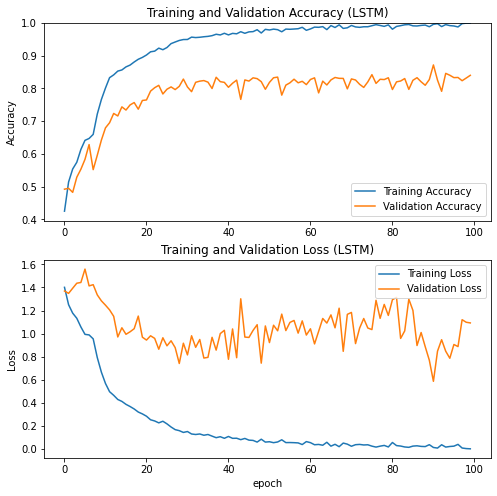

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy (LSTM)')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss (LSTM)')
plt.xlabel('epoch')
plt.savefig('lstm.png')
plt.show()

In [33]:
import os
bestmodel_path = max([f for f in os.listdir('/content/drive/MyDrive/BADS7604 Deep Learning/Assignment_4_Sequential data/lstm') \
                      if f.startswith('bestmodel_') and f.endswith('.hdf5')])

print(bestmodel_path)

lstm_best = tf.keras.models.load_model(bestmodel_path, compile=True)

bestmodel_epoch.hdf5


In [34]:
loss0, accuracy0 = lstm_best.evaluate(val, val_labels, batch_size = 64, verbose = 1)

print("initial loss: {:.4f}".format(loss0))
print("initial accuracy: {:.4f}".format(accuracy0))

71/71 [==============================] - 2s 9ms/step - loss: 0.5871 - accuracy: 0.8716
initial loss: 0.5871
initial accuracy: 0.8716


##Evaluation and prediction

In [35]:
predictions = lstm_best.predict(test)
max_test = np.argmax(test_labels, axis=1)
max_predictions = np.argmax(predictions, axis=1)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(max_test, max_predictions, target_names=class_labels, digits=4))

              precision    recall  f1-score   support

  Downstairs     0.7167    0.7478    0.7319       230
     Jogging     0.8930    0.8486    0.8702       806
     Sitting     0.8558    0.9944    0.9199       179
    Standing     1.0000    0.7627    0.8654       118
    Upstairs     0.5655    0.7597    0.6484       233
     Walking     0.8962    0.8412    0.8678       831

    accuracy                         0.8344      2397
   macro avg     0.8212    0.8257    0.8173      2397
weighted avg     0.8478    0.8344    0.8380      2397



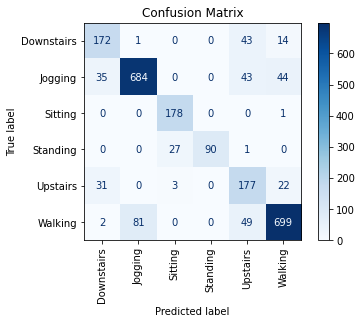

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm  = confusion_matrix(max_test, max_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

disp.plot(cmap=plt.cm.Blues)
# plt.savefig('confusion_matrix.png')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.show()

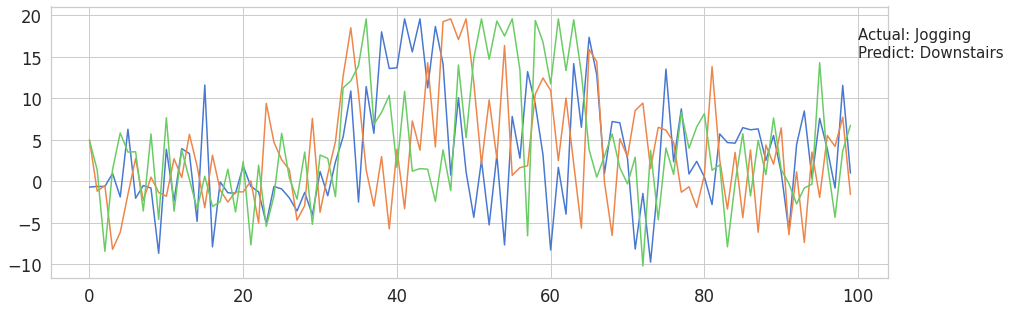

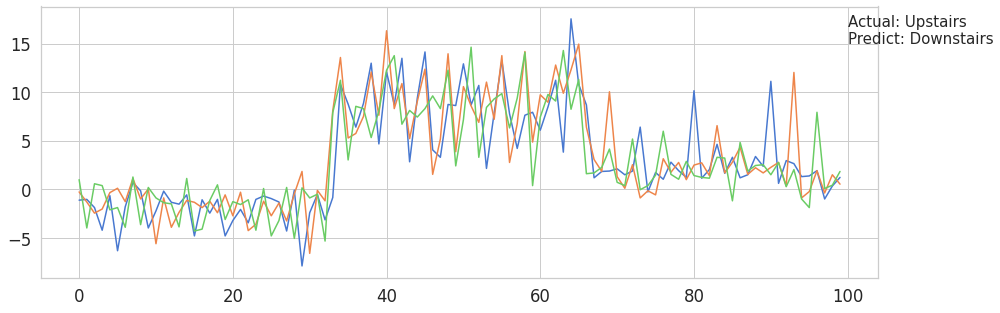

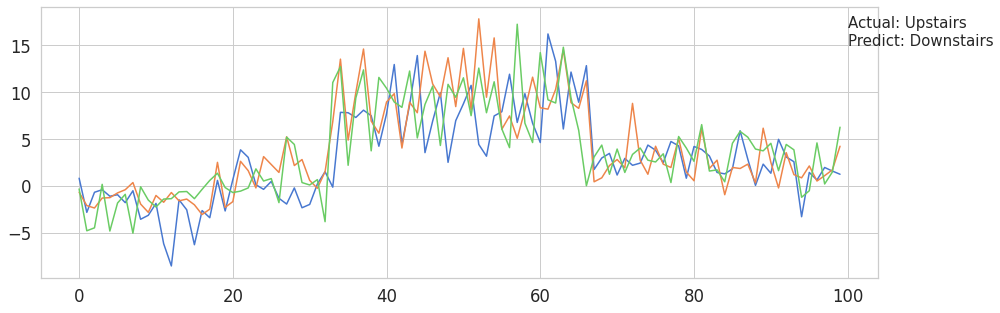

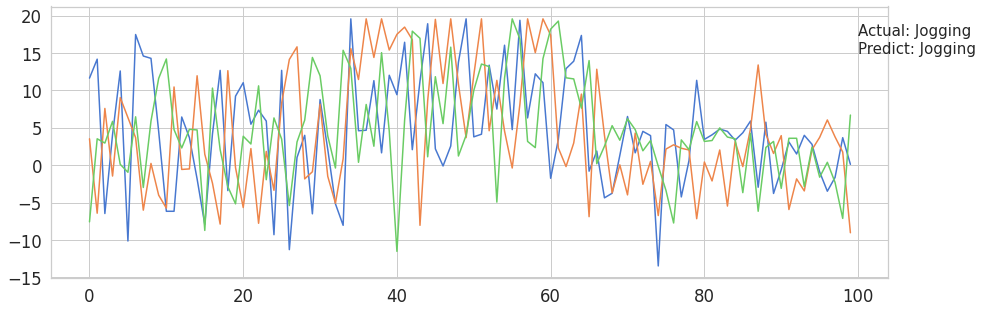

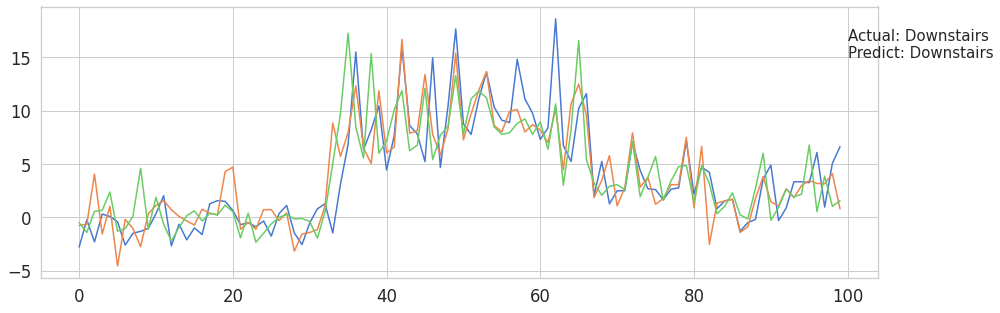

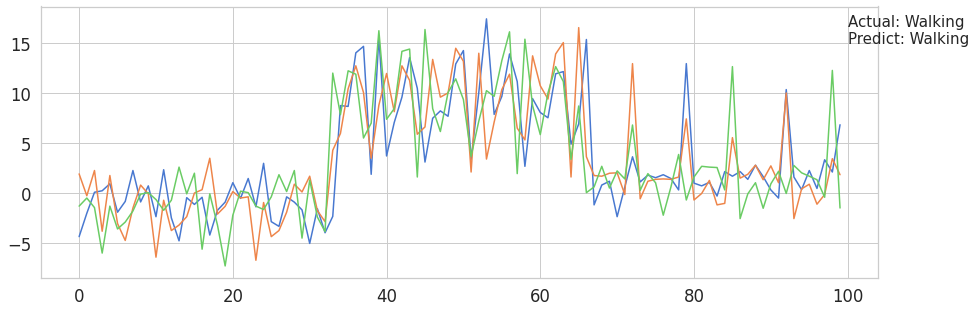

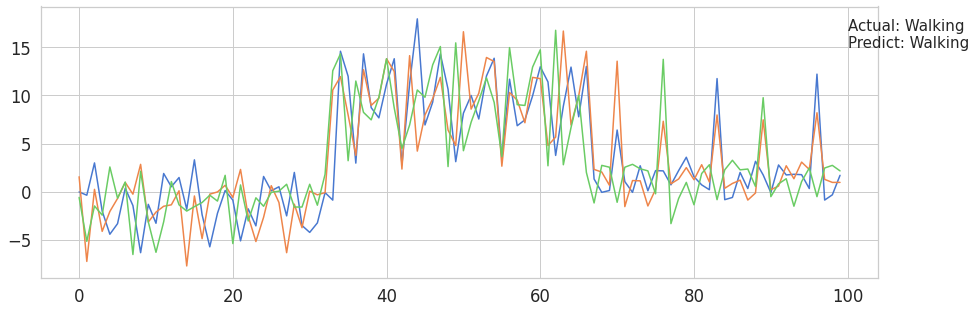

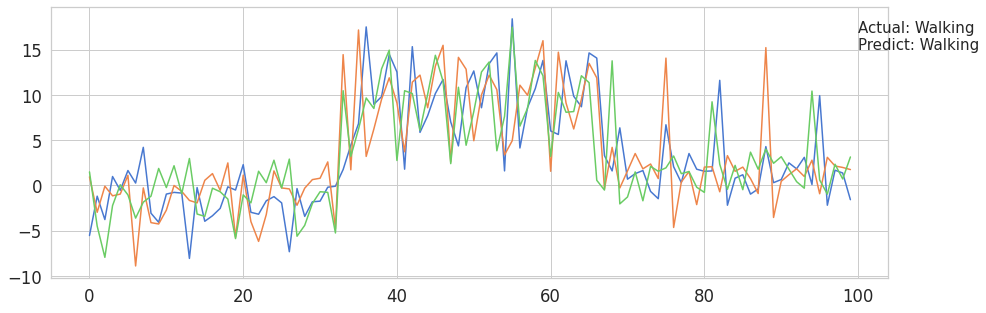

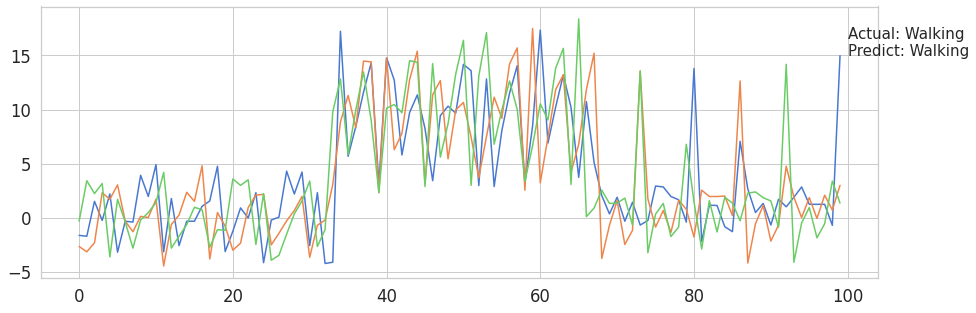

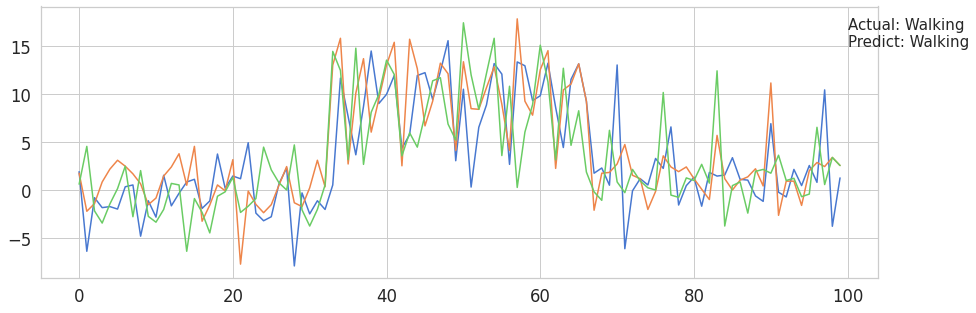

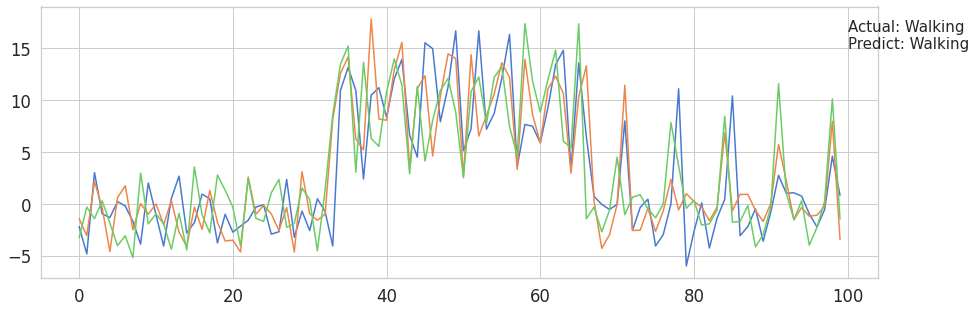

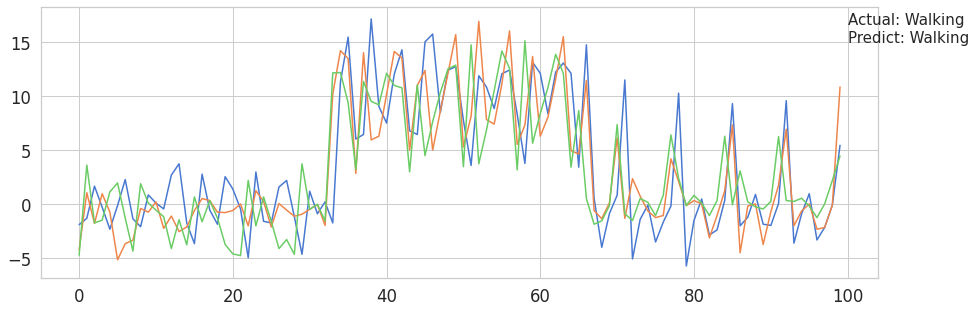

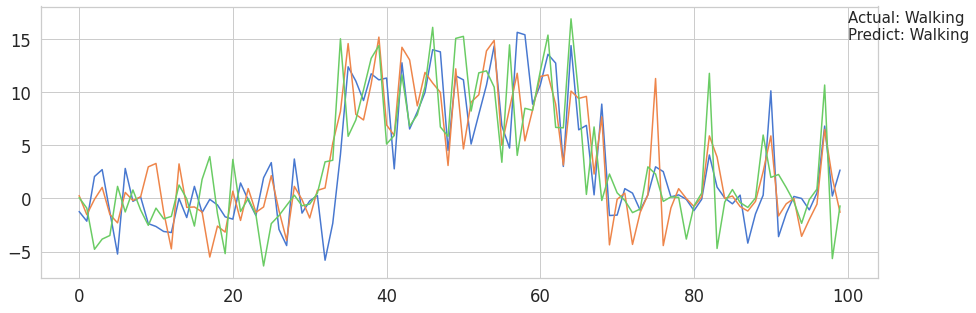

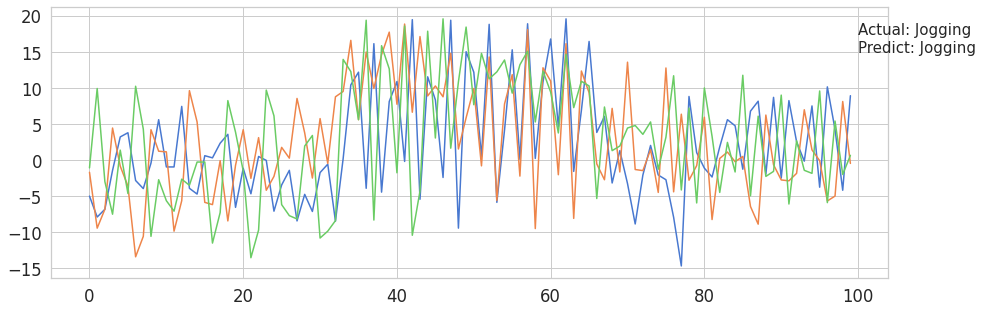

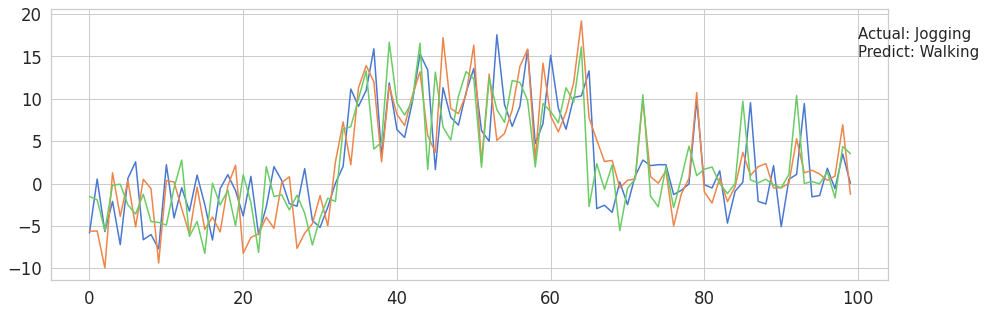

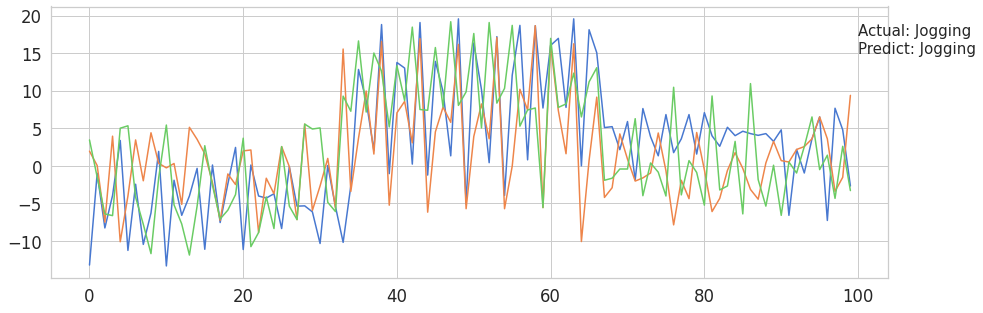

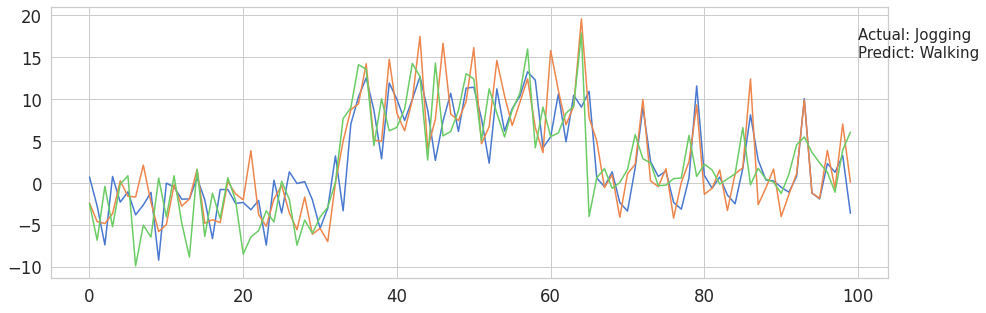

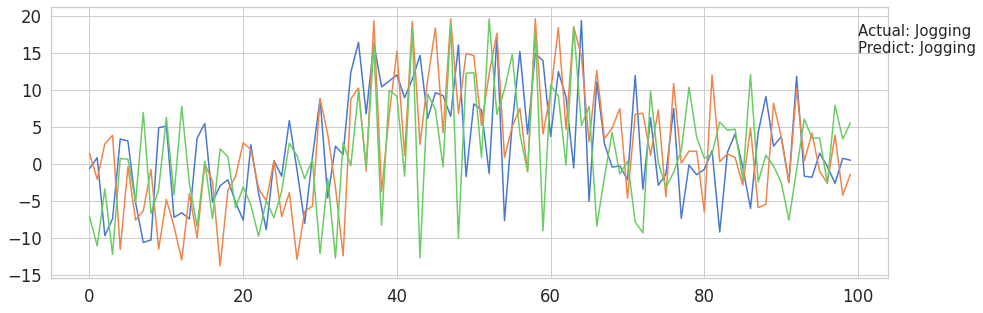

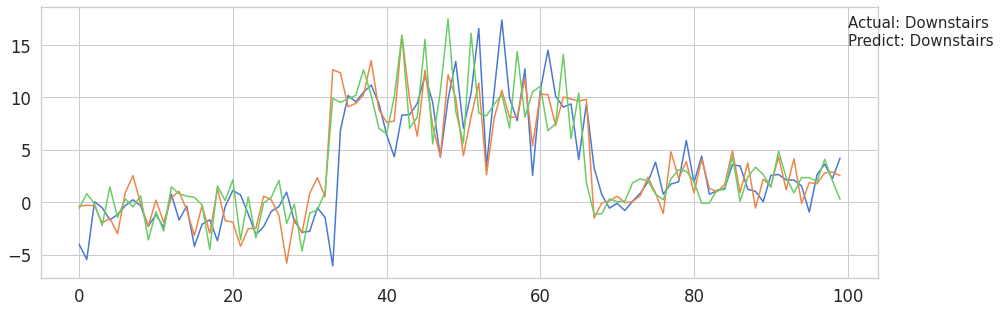

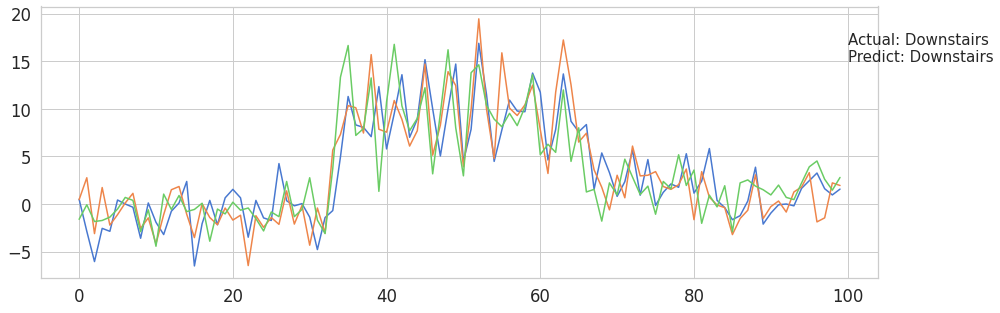

In [ ]:
for i in range(0, 1000, 50):
  p = model.predict(test[i].reshape(1, -1, 3))

  plt.plot(test[i])
  plt.text(100, 15, f'Actual: {class_labels[np.argmax(test_labels[i])]}\nPredict: {class_labels[np.argmax(p, axis=1)[0]]}', fontsize = 15)
  plt.show()